### PHASE 3 PROJECT

Team Mentor Name: Winnie Anyoso

Student name: Joseline Apiyo Odhiambo
Blog Post:https://github.com/Jodhiamboapiyo/Classification_model/blob/master/Submited.ipynb

### Introduction

## Overview

This analysis is based on churning of customers based Syria Telecommunications company.

We will use machine learning techniques to analyze telecommunications data and customer behavior patterns, with the goal of deriving actionable insights, enhancing service quality and majorly customer retention.



### Bussiness understanding

In the telecommunications industry, churn is a significant concern as it directly impacts revenue and market share.

The primary goal of churn analysis is to understand the factors that lead customers to switch to competitors or discontinue service altogether.

By identifying patterns and behaviors that precede customer churn, companies can develop proactive strategies to enhance customer retention, improve customer satisfaction, and maintain a stable revenue stream


### Data Understanding

The dataset used in this project analysis is the SyriaTel Customer Churn dataset.
The dataset includes features like call duration, charges, customer service calls, and international plan status. Analysis through descriptive statistics, visualization, and correlation helped identify key predictors of customer churn. The goal was to develop predictive models to improve customer retention and business performance at SyriaTel.

##DATA PREPARATION

A)Loading the data

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv('data.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [23]:
# Displaying the statistical summary of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


##B) Explanatory Data Analysis
**Data cleaning**

**Checking for missing values in the columns**

In [ ]:
df.isnull().sum()

,0
state,0
account length,0
area code,0
phone number,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0


**It is clear that the dataset has no missing data and the imputer is not needed for filling in the mising values**


## From the above information, we can see that our dataset does not contain any null values, so there is no need to include an imputer. The column description is as follows:

1. state- state where the customer resides.
2. area code- area code associated with the customer's phone number.
3. phone number- customer's phone number.
4.account length- duration of the customer's account with the telecom company (measured in months).
4. international plan- Whether the customer has an international calling plan (Yes/No).
5. voice mail plan- Whether the customer has a voicemail plan (Yes/No).
6. number email messages- number of voicemail messages the customer has.
7. total day minutes- total number of minutes the customer used during the daytime.
8. total day calls- total number of calls the customer made during the daytime.
9. total day charge- total charge (in currency) for daytime usage.
10. total eve minutes- total number of minutes the customer used during the evening.
11. total eve calls- total number of calls the customer made during the evening.
12. total eve charge- total charge (in currency) for evening usage.
13. total night minutes- total number of minutes the customer used during the nighttime.
14. total night calls- total number of calls the customer made during the nighttime.
15. total night charge- total charge (in currency) for nighttime usage.
16. total intl minutes- total number of international minutes used by the customer.
17. total intl calls- total number of international calls made by the customer.
18. total intl charge- total charge (in currency) for international usage.
19. customer service calls- number of customer service calls made by the customer.
20. churn- the target variable indicating whether the customer churned (discontinued the service) or not.


**Identify numerical and categorial variables**

In [35]:
# Getting numerical columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", numeric_columns)

# Getting categorical columns
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
print("Categorical Columns:", categorical_columns)

Numerical Columns: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')
Categorical Columns: Index(['international plan', 'voice mail plan', 'churn'], dtype='object')


##C)Dropping the columns

**Some features are not usufull in making a prediction whether a customer is going to churn or not.**

The columns include:


*   Phone number
*   state

**This colunms were dropped as they were not important in making a prediction. State and area code would only limit the geographical locations of the customers.**

I dropped the **phone number** column because it is likely irrelevant to predicting whether a customer will churn. Here are a few reasons why:


* Irrelevance to Churn: The phone number is simply an identifier and does not contain any meaningful information that would help in predicting churn. It's unique for each customer and does not contribute to the predictive power of the model.
* Non-Numeric and Non-Categorical Data: Since phone number is a unique identifier (likely in string format), it does not have a numerical or categorical relationship with the target variable (churn). Including such data would not be useful in a regression model and might even confuse the model, leading to poor performance.

I dropped the **State** column because it is likely irrelevant to predicting whether a customer will churn. Here are is the reason why:


* The state column represents the geographic location of the customer. In many cases, the state might not have a strong predictive value for customer churn, especially if the service is uniformly provided across different states. If there's no significant difference in customer behavior by state, this column might add noise rather than useful information.







In [4]:
# Dropping the 'phone number' and 'state' columns from the DataFrame
df = df.drop(columns=['phone number', 'state'])

# Check the first few rows to confirm the columns are dropped
df.head()


,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


##Feature Distribution

##1.1 Numerical Features

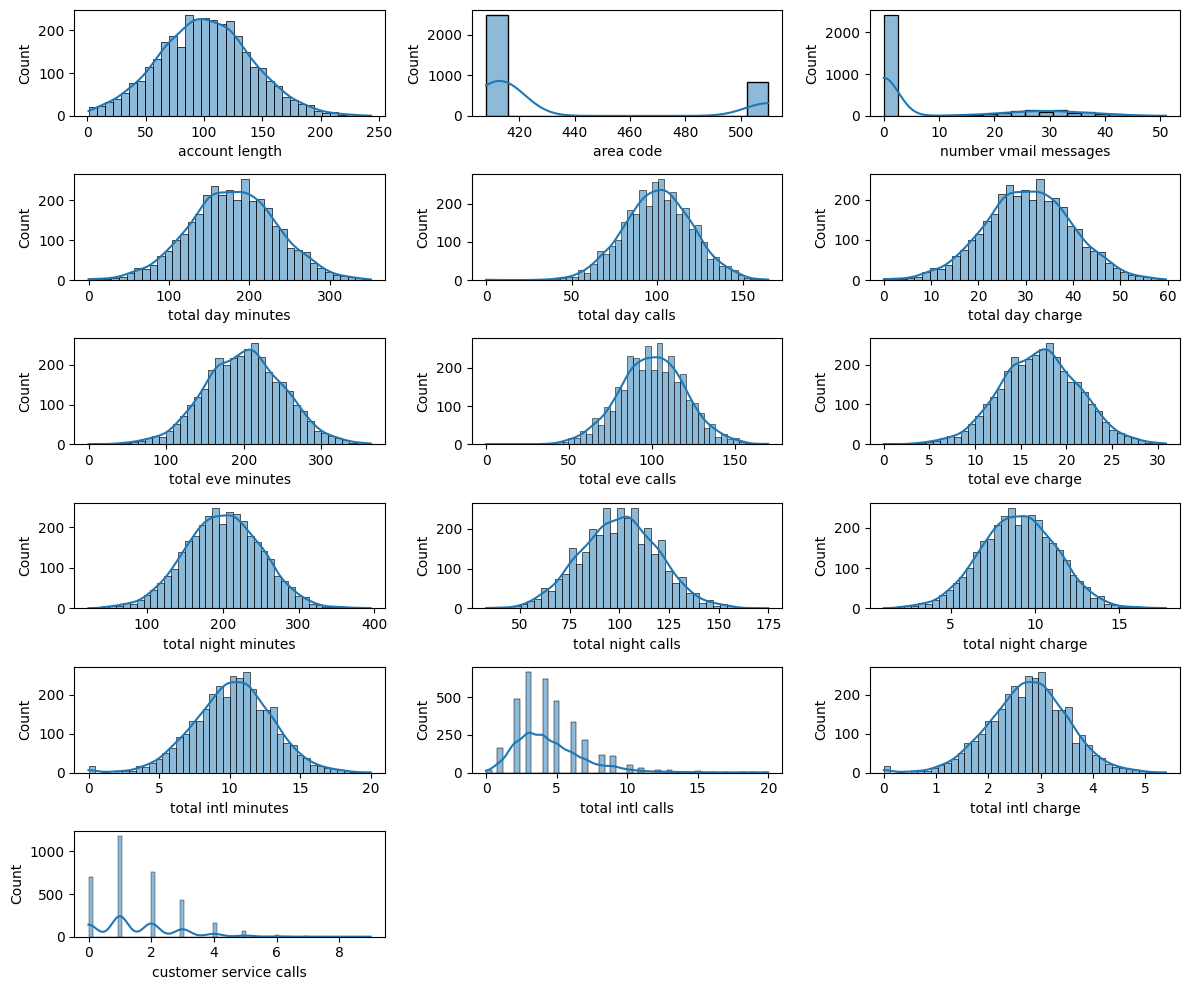

In [40]:
# Correct numeric features list based on actual column names
numeric_features = ['account length', 'area code', 'number vmail messages',
                    'total day minutes', 'total day calls', 'total day charge',
                    'total eve minutes', 'total eve calls', 'total eve charge',
                    'total night minutes', 'total night calls', 'total night charge',
                    'total intl minutes', 'total intl calls', 'total intl charge',
                    'customer service calls']

# Calculate the number of rows and columns for subplots
nrows = (len(numeric_features) - 1) // 3 + 1
ncols = min(3, len(numeric_features))

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))

# Flatten axes if necessary
axes = axes.flatten() if nrows > 1 else [axes]

# Plot numeric features
for i, feature in enumerate(numeric_features):
    ax = axes[i]
    sns.histplot(df[feature], kde=True, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

# Remove empty subplots
if len(numeric_features) < nrows * ncols:
    for i in range(len(numeric_features), nrows * ncols):
        fig.delaxes(axes[i])

# Adjust subplot spacing
fig.tight_layout()

# Display the plot
plt.show()


##1.2 Categorical Features

**Distribution of Churn and Area code**

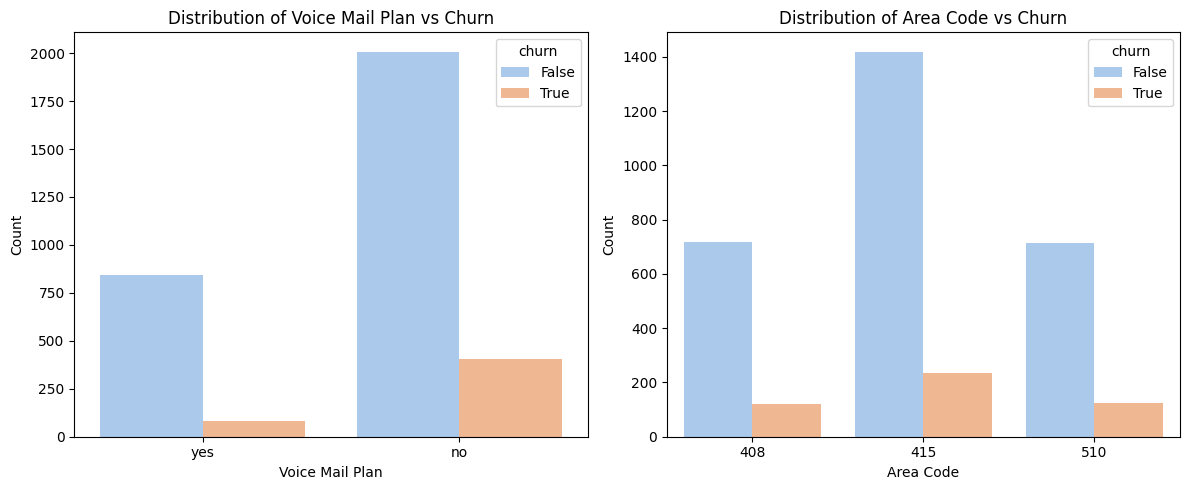

In [41]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 5))

# Plot 1: Distribution of 'voice mail plan' against 'churn'
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='voice mail plan', hue='churn', palette='pastel')
plt.title('Distribution of Voice Mail Plan vs Churn')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')

# Plot 2: Distribution of 'area code' against 'churn'
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='area code', hue='churn', palette='pastel')
plt.title('Distribution of Area Code vs Churn')
plt.xlabel('Area Code')
plt.ylabel('Count')

# Adjust the layout
plt.tight_layout()

# Show plots
plt.show()

**Analysis**

##1.Distribution of voice mail plan vs churn

*   More customers without a voicemail plan have churned: There is a higher frequency of churn among customers without a voicemail plan (labeled as "no" on the x-axis) compared to those with a voicemail plan (labeled as "yes" on the x-axis).

##2.Distribution of area code vs churn


*  The plot shows that the churn rate differs across area codes, with some having higher rates than others. For example, area code 408 appears to have a higher churn rate than area codes 415 and 510, as indicated by the taller blue bar for 408.




## Splitting the Data

In [ ]:
#splitting the data
X = df.drop(columns=columns_to_drop + ['churn'])
y = df['churn']

## Test train  split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Preprocessing